In [13]:
#한국교통안전공단 자동차 리콜 데이터를 분석하여 유효한 데이터 도출
#제조사, 모델, 월별, 생산연도, 제조사 분기별, 반기별로 분류하여 시각화
#목적 : 자동차 리콜현황을 통하여 차량별 리콜 분석, 리콜이 많이발생한 회사 분석
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn==0.9.0
import seaborn as sns 
print(sns.__version__)

try:
    import missingno as msno
except:
    !pip install missingno
    import missingno as msno

0.9.0


In [14]:
df=pd.read_csv("./한국교통안전공단_자동차결함 리콜현황_20221231.csv",
              encoding="euc-kr")

df.head()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."


In [15]:
df.head(10)

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
5,폭스바겐그룹코리아 주식회사,Golf 1.6 TDI BMT,2010-07-02,2012-10-01,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
6,메르세데스벤츠코리아(주),GLC 220 d 4MATIC,2020-08-06,2020-08-06,2022-01-07,크랭크샤프트의 내구성 부족으로 인해 엔진 부하가 높을 경우 크랭크샤프트가 파손될 수...
7,메르세데스벤츠코리아(주),E 220 d 4MATIC,2020-08-26,2020-08-26,2022-01-07,크랭크샤프트의 내구성 부족으로 인해 엔진 부하가 높을 경우 크랭크샤프트가 파손될 수...
8,메르세데스벤츠코리아(주),GLE 350 e 4MATIC Coupe,2020-03-25,2021-01-26,2022-01-07,연료탱크 압력 센서의 고정 클립이 내식성 부족으로 장기간 운행 시 고정 클립이 부식...
9,메르세데스벤츠코리아(주),GLE 350 e 4MATIC,2020-03-27,2021-01-25,2022-01-07,연료탱크 압력 센서의 고정 클립이 내식성 부족으로 장기간 운행 시 고정 클립이 부식...


In [16]:
df.tail()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
1414,비엠더블유코리아(주),BMW i4 M50,2021-11-22,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1415,비엠더블유코리아(주),BMW i4 eDrive40,2021-11-23,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1416,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,2020-02-11,2022-04-29,2022-12-27,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...
1417,화창상사(주),SPRINGFIELD,2019-10-28,2020-06-03,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...
1418,화창상사(주),CHIEF VINTAGE,2019-08-02,2020-06-04,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       1419 non-null   object
 1   차명        1419 non-null   object
 2   생산기간(부터)  1419 non-null   object
 3   생산기간(까지)  1419 non-null   object
 4   리콜개시일     1419 non-null   object
 5   리콜사유      1419 non-null   object
dtypes: object(6)
memory usage: 66.6+ KB


In [18]:
sudo pip3 install fonts-nanum

SyntaxError: invalid syntax (480404678.py, line 1)

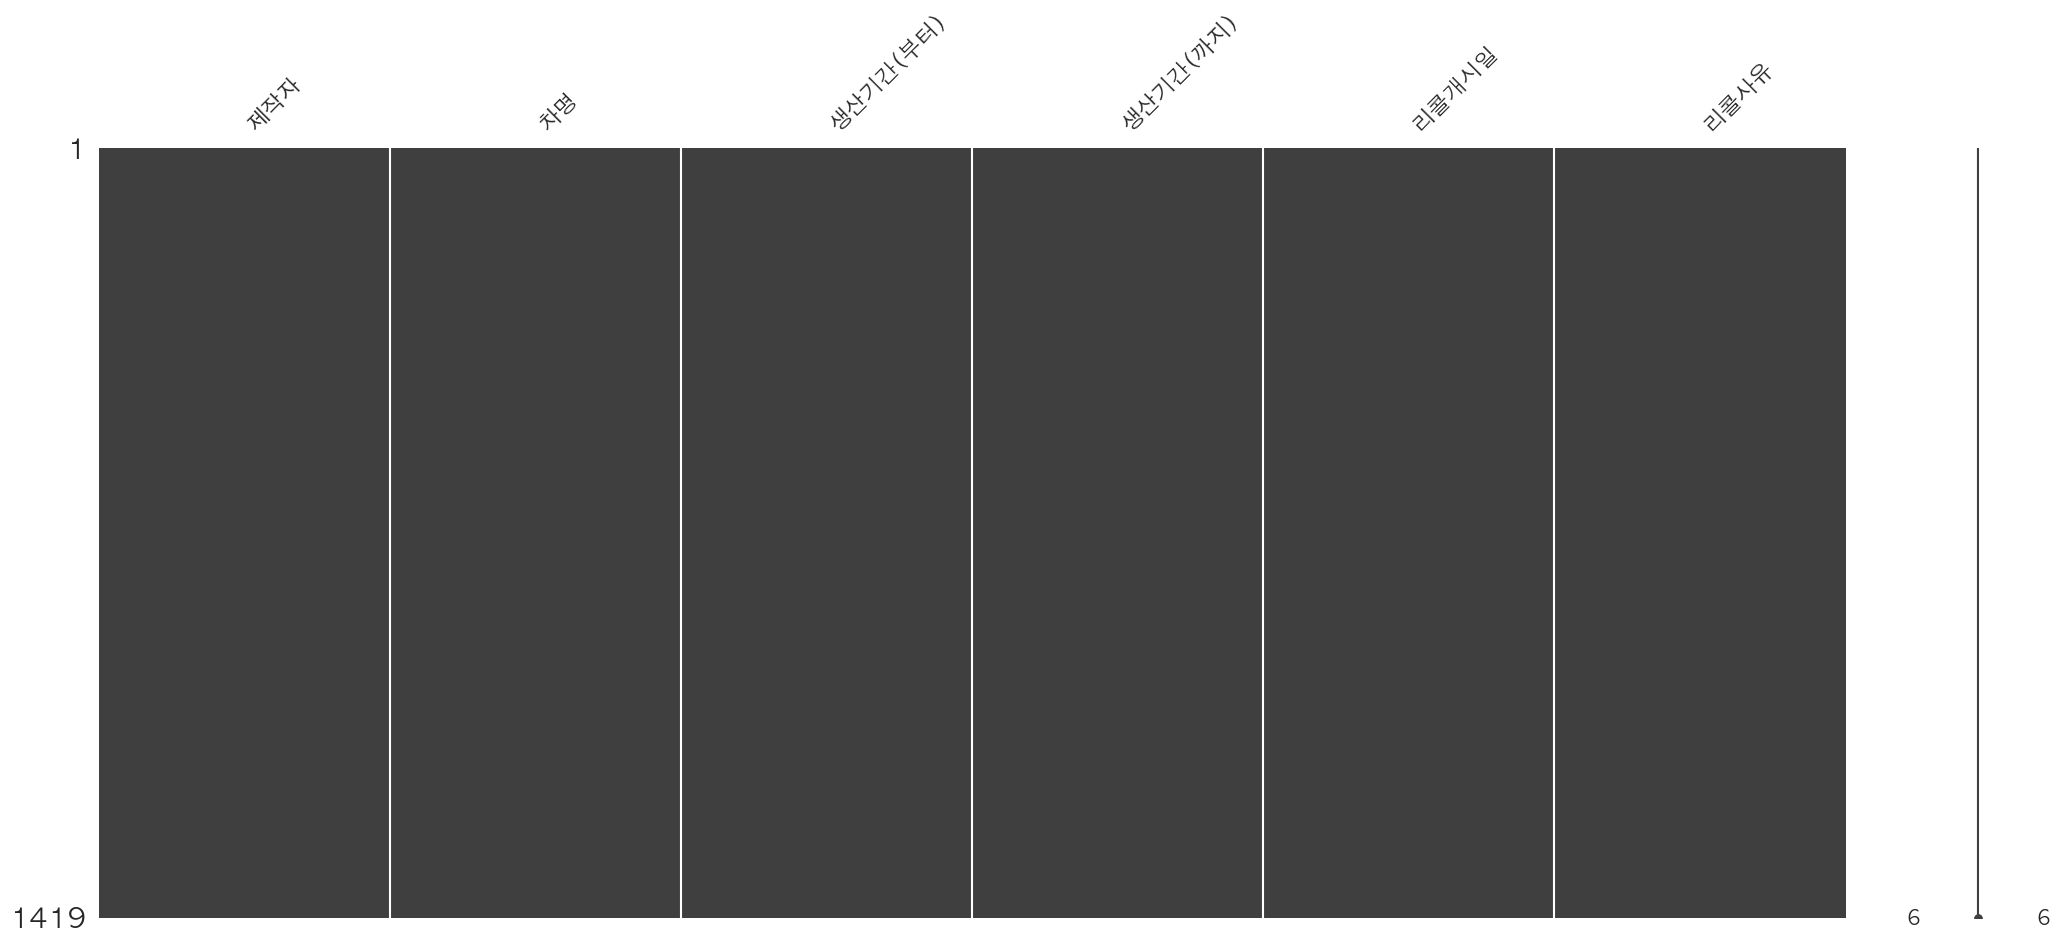

In [20]:
import matplotlib.font_manager as fm
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

# 한글폰트 추가하기
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

#맥 전용 한글 폰트 적용
sns.set(font="AppleGothic", rc={"axes.unicode_minus": False})


msno.matrix(df)
plt.show()


In [21]:
df.isna().sum() #열 별로 결측치 갯수 확인

제작자         0
차명          0
생산기간(부터)    0
생산기간(까지)    0
리콜개시일       0
리콜사유        0
dtype: int64

In [22]:
#중복값 확인
df[df.duplicated(keep=False)]


,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
303,대전기계공업(주),W800,2019-02-21,2022-02-10,2022-03-28,경음기에 전기 배선을 연결하는 단자의 내구성 부족으로 주행 중 특정한 엔진 회전 영...
304,대전기계공업(주),W800,2019-02-21,2022-02-10,2022-03-28,경음기에 전기 배선을 연결하는 단자의 내구성 부족으로 주행 중 특정한 엔진 회전 영...
392,메르세데스벤츠코리아(주),A 220,2021-09-16,2021-09-16,2022-04-08,비상 통신 시스템(eCall)을 위한 통신 모듈 소프트웨어가 사양에 맞지 않아 차량...
393,메르세데스벤츠코리아(주),A 220,2021-09-16,2021-09-16,2022-04-08,비상 통신 시스템(eCall)을 위한 통신 모듈 소프트웨어가 사양에 맞지 않아 차량...
527,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-05-02,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."
528,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-05-02,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."
1144,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1145,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1216,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-11-01,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."
1217,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-11-01,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."


In [23]:
#중복값 제거
print("제거 전 : ",len(df)) 
df=df.drop_duplicates()
print("제거 후 : ",len(df))

제거 전 :  1419
제거 후 :  1414


In [24]:
#0~4번째, 5~7번째, 8번째 부터 끝까지 값 가져오기 년,월,일 분류
def parse_year(s):
    return int(s[:4])
def parse_month(s):
    return int(s[5:7])
def parse_day(s):
    return int(s[8:])

#생산기간(시작일),생산기간(마감일),리콜개시일 문자열->정수형으로 변환
#분석의 편리성을 위해 영어로 변경
df['start_year']=df['생산기간(부터)'].apply(parse_year)
df['start_month']=df['생산기간(부터)'].apply(parse_month)
df['start_day']=df['생산기간(부터)'].apply(parse_day)

df['end_year']=df['생산기간(까지)'].apply(parse_year)
df['end_month']=df['생산기간(까지)'].apply(parse_month)
df['end_day']=df['생산기간(까지)'].apply(parse_day)

df['recall_year']=df['리콜개시일'].apply(parse_year)
df['recall_month']=df['리콜개시일'].apply(parse_month)
df['recall_day']=df['리콜개시일'].apply(parse_day)

df['manufacturer']=df['제작자']
df['model']=df['차명']

df.head(3)



,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day,manufacturer,model
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...,2021,4,29,2021,5,12,2022,1,3,혼다코리아(주),CBR1000RR-R
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,11,17,2014,11,25,2022,1,5,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,11,5,2015,2,26,2022,1,5,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS


In [25]:
#데이터 연도 확인
df.recall_year.min(), df.recall_year.max()

(2022, 2022)

In [26]:
df.columns

Index(['제작자', '차명', '생산기간(부터)', '생산기간(까지)', '리콜개시일', '리콜사유', 'start_year',
       'start_month', 'start_day', 'end_year', 'end_month', 'end_day',
       'recall_year', 'recall_month', 'recall_day', 'manufacturer', 'model'],
      dtype='object')

In [27]:
#제조사별 리콜 건수 분포 확인
df.groupby("manufacturer").count()["model"].sort_values(ascending=False)


manufacturer
비엠더블유코리아(주)         432
메르세데스벤츠코리아(주)       329
폭스바겐그룹코리아 주식회사      216
현대자동차(주)             61
만트럭버스코리아(주)          41
기아주식회사               38
포드세일즈서비스코리아(유)       37
(주)에프엠케이             31
스텔란티스코리아주식회사         31
(주)재규어랜드로버코리아        24
(유)기흥모터스             21
포르쉐코리아 주식회사          20
테슬라코리아 유한회사          20
화창상사(주)              16
혼다코리아(주)             15
(주)볼보자동차코리아          13
스카니아코리아그룹(주)          9
다임러트럭코리아(주)           9
르노코리아자동차 주식회사         7
한국토요타자동차(주)           5
(주)피라인                5
지엠코리아(주)              4
범한자동차 주식회사            4
볼보트럭코리아(주)            4
대전기계공업(주)             3
(주) 바이크코리아            3
한국지엠(주)               3
(주) 한국모터트레이딩          3
(주)다산중공업              2
모토스타코리아(주)            2
기흥인터내셔널 유한회사          1
유한회사 모토로싸             1
주식회사 마이브              1
(주)스포츠모터사이클코리아        1
폴스타오토모티브코리아 유한회사      1
한신특장                  1
Name: model, dtype: int64

In [28]:
#데이터프레임을 설정하여 리콜 수 확인
pd.DataFrame(df.groupby("manufacturer").count()
["model"].sort_values(ascending=False)).rename(columns={"model":"count"})

,count
manufacturer,
비엠더블유코리아(주),432
메르세데스벤츠코리아(주),329
폭스바겐그룹코리아 주식회사,216
현대자동차(주),61
만트럭버스코리아(주),41
기아주식회사,38
포드세일즈서비스코리아(유),37
(주)에프엠케이,31
스텔란티스코리아주식회사,31


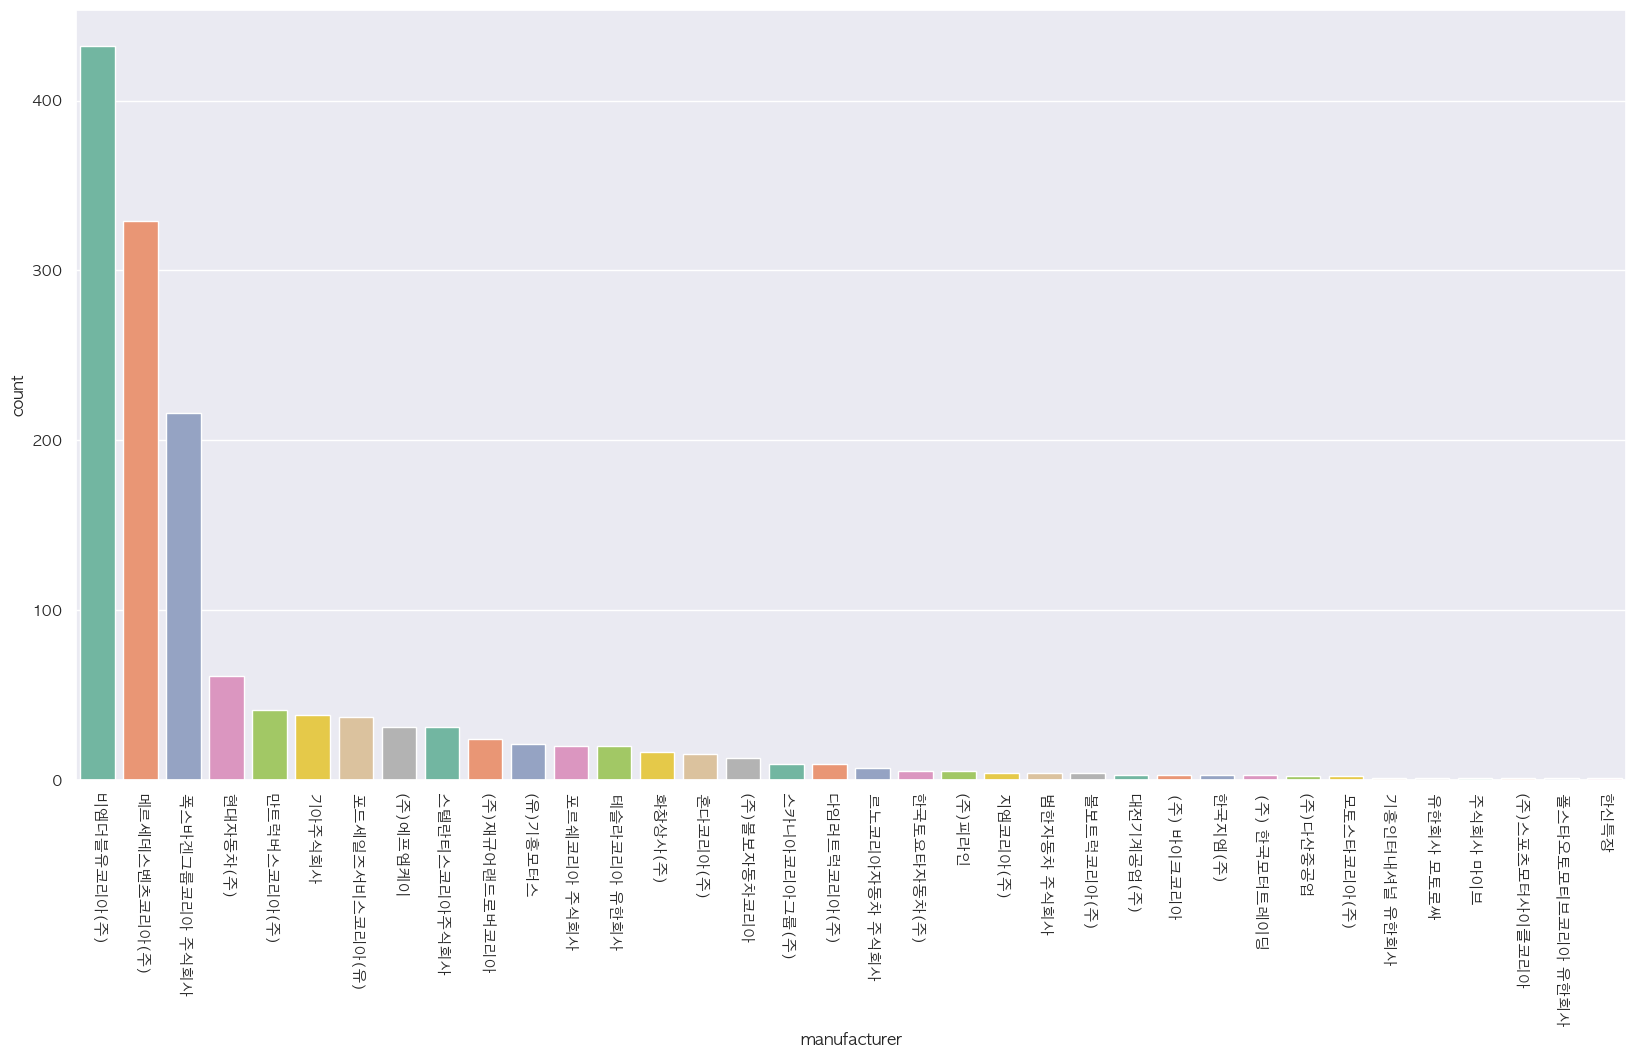

In [29]:
#데이터프레임설정 가로=제조사(manufacturer),세로=리콜수
tmp=pd.DataFrame(df.groupby("manufacturer").count()
                ["model"].sort_values(ascending=False)).rename(columns={"model":
                                                                   "count"})

plt.figure(figsize=(20,10))
#폰트설정
sns.set(font="AppleGothic", rc={"axes.unicode_minus": False},
       style='darkgrid')

ax=sns.countplot(x="manufacturer", data=df, palette="Set2",
                order=tmp.index)
#막대그래프를 통한 시각화
plt.xticks(rotation=270)
plt.show()

In [30]:
tmp.index

Index(['비엠더블유코리아(주)', '메르세데스벤츠코리아(주)', '폭스바겐그룹코리아 주식회사', '현대자동차(주)',
       '만트럭버스코리아(주)', '기아주식회사', '포드세일즈서비스코리아(유)', '(주)에프엠케이', '스텔란티스코리아주식회사',
       '(주)재규어랜드로버코리아', '(유)기흥모터스', '포르쉐코리아 주식회사', '테슬라코리아 유한회사', '화창상사(주)',
       '혼다코리아(주)', '(주)볼보자동차코리아', '스카니아코리아그룹(주)', '다임러트럭코리아(주)',
       '르노코리아자동차 주식회사', '한국토요타자동차(주)', '(주)피라인', '지엠코리아(주)', '범한자동차 주식회사',
       '볼보트럭코리아(주)', '대전기계공업(주)', '(주) 바이크코리아', '한국지엠(주)', '(주) 한국모터트레이딩',
       '(주)다산중공업', '모토스타코리아(주)', '기흥인터내셔널 유한회사', '유한회사 모토로싸', '주식회사 마이브',
       '(주)스포츠모터사이클코리아', '폴스타오토모티브코리아 유한회사', '한신특장'],
      dtype='object', name='manufacturer')

In [31]:
pd.DataFrame(df.groupby("model").count()     //모델별 리콜 건수
            ["start_year"].sort_values(ascending=False)).rename(columns
                                                               ={"start_year":"count"}).head(10)

,count
model,
328i,25
TGX,22
TGS,18
C 300,13
328xi,11
S 580 4MATIC,10
S 350 d,10
C 200 4MATIC,9
GLE 300 d 4MATIC,9


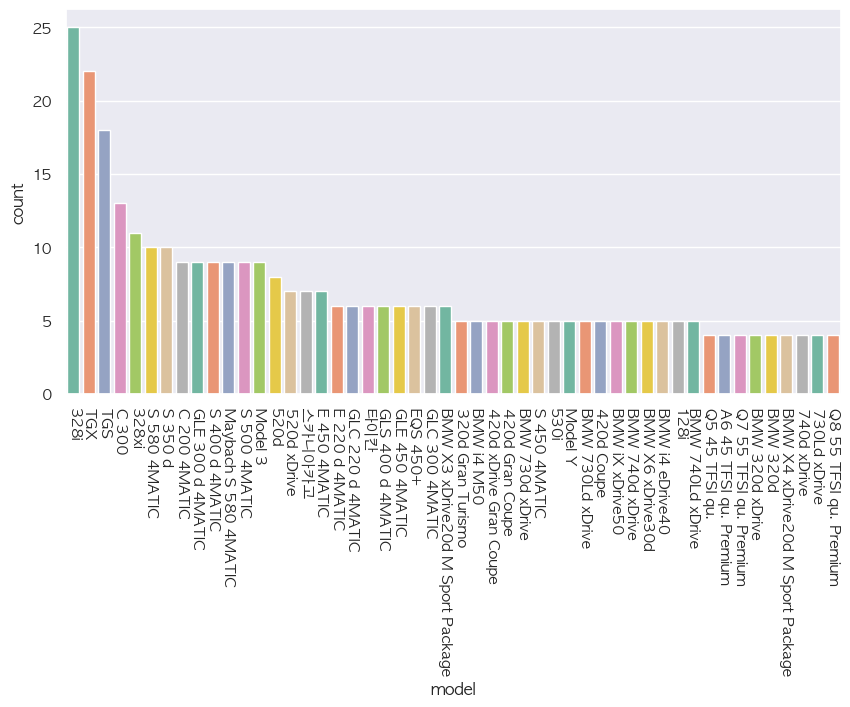

In [55]:
#상위 50모델만 뽑아서 지정
tmp=pd.DataFrame(df.groupby("model").count()
                ["manufacturer"].sort_values(ascending=False))
tmp=tmp.rename(columns={"manufacturer":"count"}).iloc[:50]

#그래프 사이즈 지정
plt.figure(figsize=(10,5))

sns.set(font="AppleGothic", rc={"axes.unicode_minus": False},
       style='darkgrid')
ax=sns.countplot(x="model",data=df[df.model.isin(tmp.index)],
                palette="Set2",order=tmp.index)
plt.xticks(rotation=270)
#상위 50개 모델 그래프로 시각화
plt.show()



In [44]:
#월별 리콜 현황 출력
pd.DataFrame(df.groupby("recall_month").count()
            ["start_year"].sort_values(ascending=False)).rename(columns={"start_year":
                                                                        "count"})

,count
recall_month,
2,177
4,171
6,152
8,138
12,138
10,135
3,122
5,90
9,87


In [74]:
#2021년에 리콜이 가장 많이 일어난 달과 적게 일어난 달의 차이 구해보기

tmp=pd.DataFrame(df.groupby("recall_month").count()
                ["start_year"].sort_values(ascending=False)).rename(columns={"start_year":
                                                                              "count"})
##많이일어난달 iloc[0]- 적게일어난 달 iloc[-1]                                                                           
answer=tmp.iloc[0]["count"]-tmp.iloc[-1]["count"]

print("정답은 : ",answer)

정답은 :  122


In [79]:
#4분기 제조사별 리콜 현황 출력해보기

df[df.recall_month.isin([10,11,12])].head()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day,manufacturer,model
1080,(주)에프엠케이,페라리Roma,2020-01-01,2022-06-30,2022-10-04,브레이크 오일 리저버 탱크 캡에서 대기압을 유지하기 위한 공기통로의 불량으로 브레이...,2020,1,1,2022,6,30,2022,10,4,(주)에프엠케이,페라리Roma
1081,(주)에프엠케이,페라리F8Spider,2020-01-01,2022-06-30,2022-10-04,브레이크 오일 리저버 탱크 캡에서 대기압을 유지하기 위한 공기통로의 불량으로 브레이...,2020,1,1,2022,6,30,2022,10,4,(주)에프엠케이,페라리F8Spider
1082,(주)에프엠케이,페라리F8Tributo,2019-01-01,2022-06-30,2022-10-04,브레이크 오일 리저버 탱크 캡에서 대기압을 유지하기 위한 공기통로의 불량으로 브레이...,2019,1,1,2022,6,30,2022,10,4,(주)에프엠케이,페라리F8Tributo
1083,(주)에프엠케이,페라리PortofinoM,2021-01-01,2022-06-30,2022-10-04,브레이크 오일 리저버 탱크 캡에서 대기압을 유지하기 위한 공기통로의 불량으로 브레이...,2021,1,1,2022,6,30,2022,10,4,(주)에프엠케이,페라리PortofinoM
1084,(주)에프엠케이,페라리Portofino,2018-01-01,2020-12-31,2022-10-04,브레이크 오일 리저버 탱크 캡에서 대기압을 유지하기 위한 공기통로의 불량으로 브레이...,2018,1,1,2020,12,31,2022,10,4,(주)에프엠케이,페라리Portofino


In [86]:
#numpy 버전 해결
pip install numpy==1.20.3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 8.8 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1196 lines of output]
      setup.py:66: RuntimeWarning: NumPy 1.20.3 may not yet support Python 3.11.
        warnings.warn(
      Running from numpy source directory.
      numpy/random/_bounded_integers.pxd.in has not changed
      numpy/random/_philox.pyx has not changed
      numpy/random/_bounded_integers.pyx.in has not changed
      numpy/random/_sfc64.pyx has not changed
      numpy/random/_mt19937.pyx has not changed
      numpy/random/bit_generator.pyx has not changed
      Processing numpy/random/_bounded_integers.pyx
      numpy/random/mtrand.pyx has not changed
      numpy/random/_generator.pyx has not changed
      num

Note: you may need to restart the kernel to use updated packages.


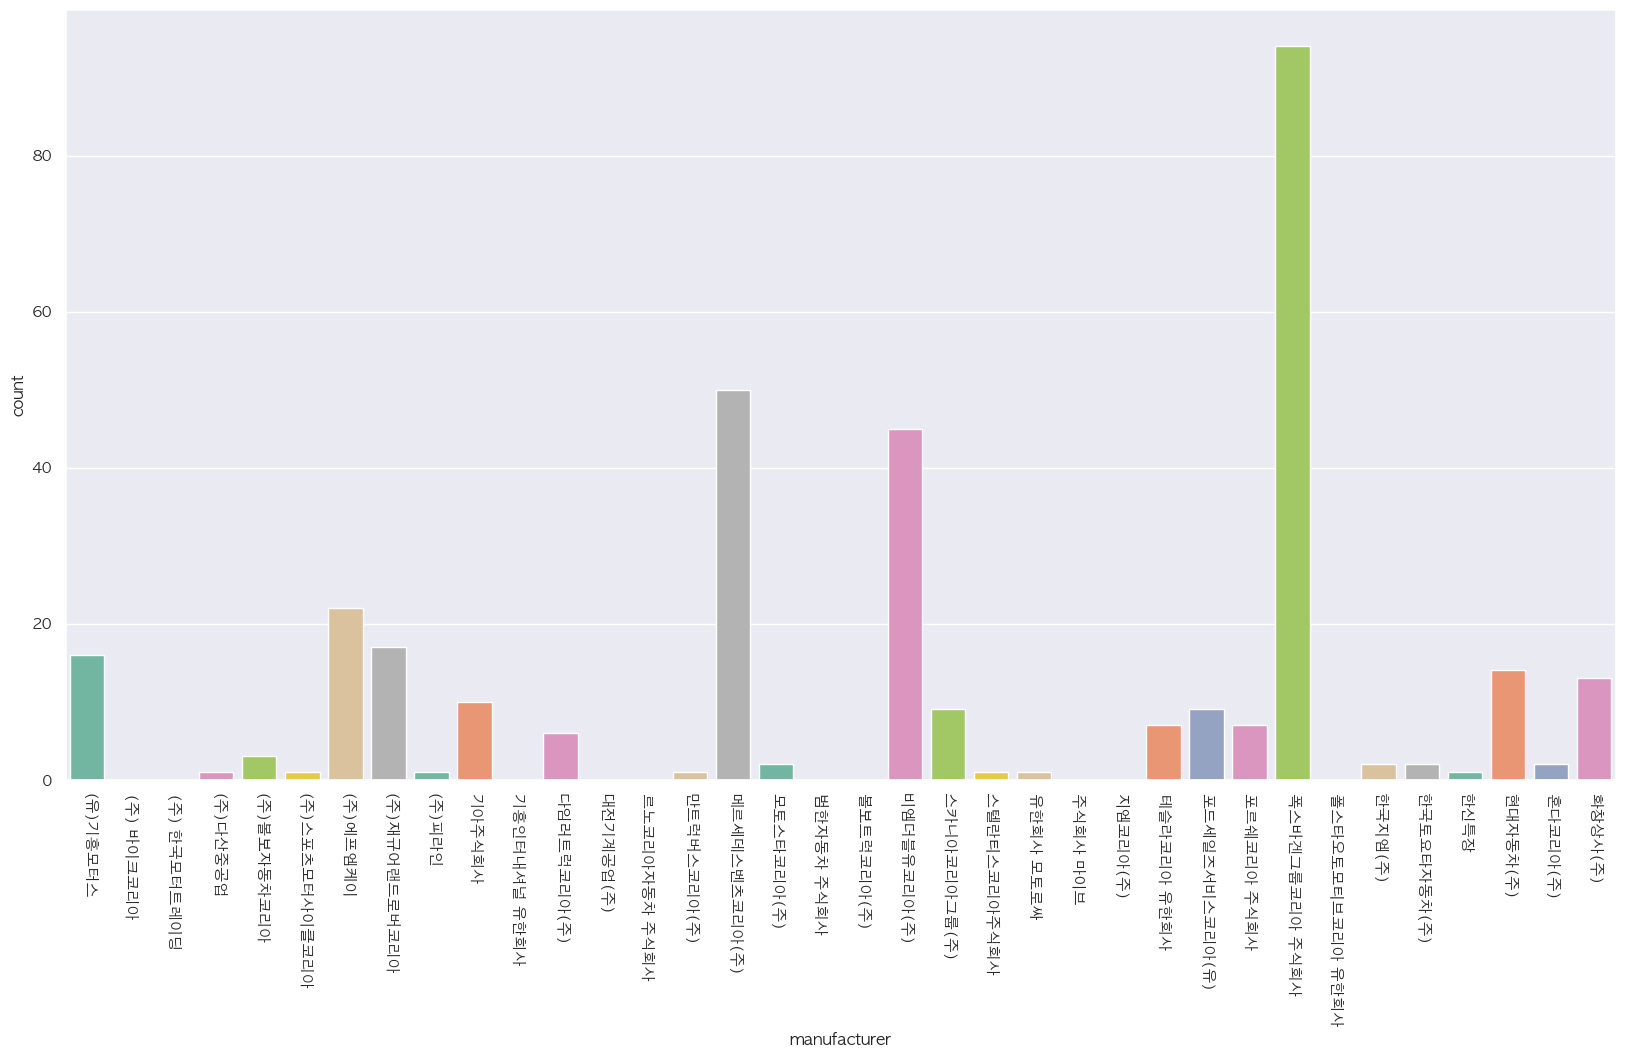

In [94]:
#카테고리 설정
df['manufacturer'] = df['manufacturer'].astype('category')

plt.figure(figsize=(20,10))
sns.set(font="AppleGothic", rc={"axes.unicode_minus": False},
       style='darkgrid')
ax=sns.countplot(x="manufacturer",
                data=df[df.recall_month.isin([10,11,12])],palette="Set2")
plt.xticks(rotation=270)
plt.show()

In [95]:
#하반기 생산연도별 리콜현황

df[df.recall_month>=7].head()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day,manufacturer,model
770,메르세데스벤츠코리아(주),E 220 d Coupe,2018-06-14,2019-12-06,2022-07-01,냉각수 펌프를 제어하는 엔진 컨트롤 유닛의 소프트웨어 오류로 인해 냉각수 펌프내 진...,2018,6,14,2019,12,6,2022,7,1,메르세데스벤츠코리아(주),E 220 d Coupe
771,메르세데스벤츠코리아(주),E 220 d,2019-01-17,2019-05-06,2022-07-01,냉각수 펌프를 제어하는 엔진 컨트롤 유닛의 소프트웨어 오류로 인해 냉각수 펌프내 진...,2019,1,17,2019,5,6,2022,7,1,메르세데스벤츠코리아(주),E 220 d
772,메르세데스벤츠코리아(주),GLE 350 e 4MATIC Coupe,2020-03-25,2021-10-04,2022-07-01,차량 생산 공정 상의 오류로 인해 파워일렉트로닉스1에 연결되는 12V 전원 공급 배...,2020,3,25,2021,10,4,2022,7,1,메르세데스벤츠코리아(주),GLE 350 e 4MATIC Coupe
773,메르세데스벤츠코리아(주),GLE 350 e 4MATIC,2020-03-27,2021-09-28,2022-07-01,차량 생산 공정 상의 오류로 인해 파워일렉트로닉스1에 연결되는 12V 전원 공급 배...,2020,3,27,2021,9,28,2022,7,1,메르세데스벤츠코리아(주),GLE 350 e 4MATIC
774,비엠더블유코리아(주),X7 xDrive30d Design Pure Excellence,2018-07-19,2020-07-28,2022-07-06,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성,2018,7,19,2020,7,28,2022,7,6,비엠더블유코리아(주),X7 xDrive30d Design Pure Excellence


,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day,manufacturer,model
770,메르세데스벤츠코리아(주),E 220 d Coupe,2018-06-14,2019-12-06,2022-07-01,냉각수 펌프를 제어하는 엔진 컨트롤 유닛의 소프트웨어 오류로 인해 냉각수 펌프내 진...,메르세데스벤츠코리아(주),6,14,2019,12,6,2022,7,1,메르세데스벤츠코리아(주),E 220 d Coupe
771,메르세데스벤츠코리아(주),E 220 d,2019-01-17,2019-05-06,2022-07-01,냉각수 펌프를 제어하는 엔진 컨트롤 유닛의 소프트웨어 오류로 인해 냉각수 펌프내 진...,메르세데스벤츠코리아(주),1,17,2019,5,6,2022,7,1,메르세데스벤츠코리아(주),E 220 d
772,메르세데스벤츠코리아(주),GLE 350 e 4MATIC Coupe,2020-03-25,2021-10-04,2022-07-01,차량 생산 공정 상의 오류로 인해 파워일렉트로닉스1에 연결되는 12V 전원 공급 배...,메르세데스벤츠코리아(주),3,25,2021,10,4,2022,7,1,메르세데스벤츠코리아(주),GLE 350 e 4MATIC Coupe
773,메르세데스벤츠코리아(주),GLE 350 e 4MATIC,2020-03-27,2021-09-28,2022-07-01,차량 생산 공정 상의 오류로 인해 파워일렉트로닉스1에 연결되는 12V 전원 공급 배...,메르세데스벤츠코리아(주),3,27,2021,9,28,2022,7,1,메르세데스벤츠코리아(주),GLE 350 e 4MATIC
774,비엠더블유코리아(주),X7 xDrive30d Design Pure Excellence,2018-07-19,2020-07-28,2022-07-06,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성,비엠더블유코리아(주),7,19,2020,7,28,2022,7,6,비엠더블유코리아(주),X7 xDrive30d Design Pure Excellence


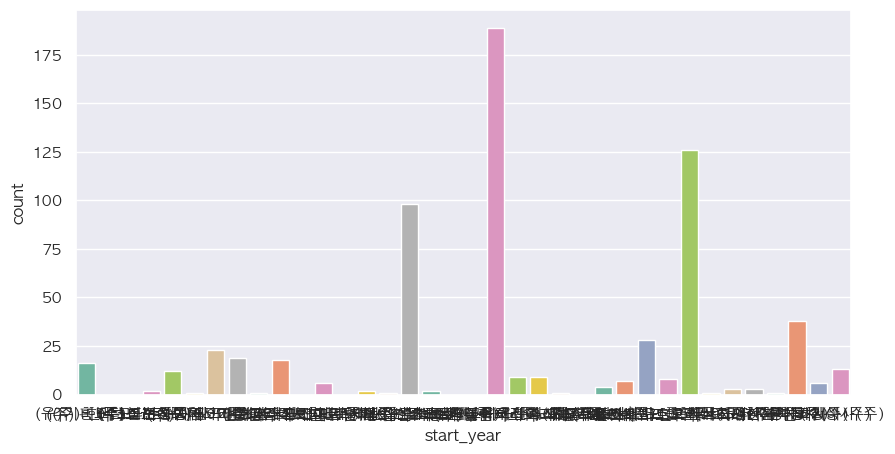

In [102]:

df['start_year'] = df['start_year'].astype('category')
plt.figure(figsize=(10,5))
sns.set(font="AppleGothic", rc={"axes.unicode_minus": False},
       style='darkgrid')
ax=sns.countplot(x="start_year",data=df[df.recall_month>=7],
                palette="Set2")
plt.show()

In [107]:
#벤츠의 제품중 최근에 리콜된 모델명 구해보기
x=df[df['manufacturer']=="메르세데스벤츠코리아(주)"].sort_values(by=["recall_year",
                                                        "recall_month","recall_day"],ascending=False).iloc[0]['model']
print('벤츠에서 가장 최근에 리콜이 개시된 차량의 모델명은 : ',x)

벤츠에서 가장 최근에 리콜이 개시된 차량의 모델명은 :  Mercedes-AMG CLS 53 4MATIC+
